Install osmx

In [1]:
!pip install osmnx

Import library yang dibutuhkan

In [2]:
# from google.colab import files
import osmnx as ox
import matplotlib.pyplot as plt
import random
import networkx as nx

Pengumpulan data

In [3]:
# Specify the location (Yogyakarta, Indonesia)
place_name = "Kota Yogyakarta"

# Retrieve the street network data for Yogyakarta
graph = ox.graph_from_place(place_name, network_type='drive')

# Save dan download data
graphml_data = ox.save_graphml(graph, 'street_yogyakarta.graphml')
# files.download("street_network.graphml")

Load data dan tampilkan

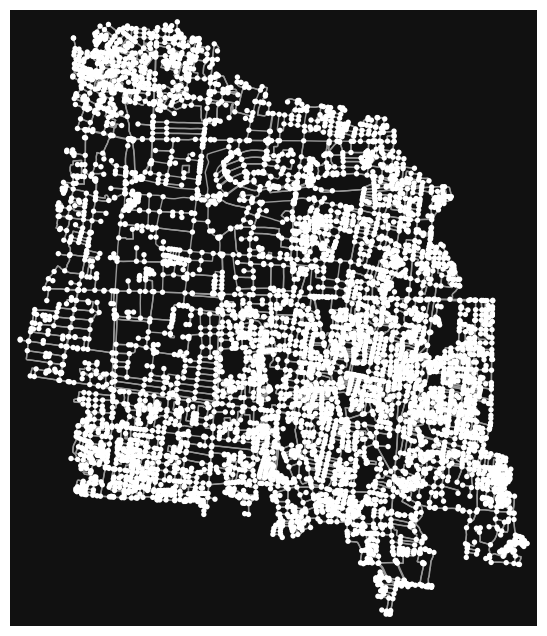

In [5]:
graph = ox.load_graphml('street_yogyakarta.graphml')
fig, ax = ox.plot_graph(graph, show=False, close=False)
plt.show()

In [5]:
import osmnx as ox
import matplotlib.pyplot as plt

# Define the place name
place_name = "Kota Yogyakarta"

# Retrieve the graph
graph = ox.graph_from_place(place_name, network_type='drive')

# Define new node coordinates with attributes x, y, and name
coords = [
    {'id': None, 'name': 'A', 'label': "Dr. Sardjito General Hospital", 'y': -7.768591316, 'x': 110.3734748},
    {'id': None, 'name': 'B', 'label': "PKU Muhammadiyah Hospital Of Yogyakarta", 'y': -7.801116509, 'x': 110.3622574},
    {'id': None, 'name': 'C', 'label': "RS DKT Dr. Soetarto", 'y': -7.785557979, 'x': 110.3768261},
    {'id': None, 'name': 'D', 'label': "Bethesda Hospital Lempuyangwangi", 'y': -7.796834198, 'x': 110.373173},
    {'id': None, 'name': 'E', 'label': "Siloam Hospitals Yogyakarta", 'y': -7.783412035, 'x': 110.3908789},
    {'id': None, 'name': 'F', 'label': "RSU Sakina Idaman", 'y': -7.7672996, 'x': 110.3679689},
    {'id': None, 'name': 'G', 'label': "Rumah Sakit Umum Daerah (RSUD) Kota Yogyakarta", 'y': -7.82495864, 'x': 110.3778669},
    {'id': None, 'name': 'H', 'label': "Ludira Husada Tama Hospital", 'y': -7.792535824, 'x': 110.3530078},
    {'id': None, 'name': 'I', 'label': "RS Pratama", 'y': -7.81559439, 'x': 110.3739044},
    {'id': None, 'name': 'J', 'label': "Hidayatullah Islamic Hospital", 'y': -7.815317059, 'x': 110.3877556},
    {'id': None, 'name': 'K', 'label': "Dr. Yap Eye Hospital", 'y': -7.780772008, 'x': 110.3750042},
    {'id': None, 'name': 'L', 'label': "Panti Rapih Hospital", 'y': -7.777223486, 'x': 110.37617},
    {'id': None, 'name': 'M', 'label': "Asri Medical Centre (AMC)", 'y': -7.799633653, 'x': 110.3517184},
    {'id': None, 'name': 'N', 'label': "RS Khusus Bedah An Nur Yogyakarta", 'y': -7.777915363, 'x': 110.3869576},
    {'id': None, 'name': 'O', 'label': "Happy Land Medical Centre", 'y': -7.793955977, 'x': 110.3919216},
    {'id': None, 'name': 'P', 'label': "Bethesda Hospital, Yogyakarta", 'y': -7.783250476, 'x': 110.3782158},
    {'id': None, 'name': 'Q', 'label': "RSKIA PKU Muhammadiyah Kotagede", 'y': -7.822861507, 'x': 110.4007623},
    {'id': None, 'name': 'R', 'label': "Rachmi Maternity Hospital Yogyakarta", 'y': -7.803604326, 'x': 110.3565274},
    {'id': None, 'name': 'S', 'label': "Puri Nirmala Psychiatric Hospital", 'y': -7.801104078, 'x': 110.3772852},
    {'id': None, 'name': 'T', 'label': "RSKIA Permata Bunda", 'y': -7.820372667, 'x': 110.3997913},
    {'id': None, 'name': 'U', 'label': "RSKIA 45 Prof. dr. Ismangoen", 'y': -7.807432974, 'x': 110.3463673},
    {'id': None, 'name': 'V', 'label': "Rumah Sakit Khusus Ibu dan Anak Bhakti", 'y': -7.814817385, 'x': 110.381594},
    {'id': None, 'name': 'W', 'label': "RSK Bedah Soedirman", 'y': -7.800288211, 'x': 110.3976357},
    {'id': None, 'name': 'X', 'label': "RSKIA Fajar", 'y': -7.80861363, 'x': 110.3499625},
    {'id': None, 'name': 'Y', 'label': "RSUP Sardjito VVIP Ayodya", 'y': -7.770075684, 'x': 110.3717455},
    {'id': None, 'name': 'Z', 'label': "RSGM UGM Prof. Soedomo", 'y': -7.770127252, 'x': 110.3737593},
]

# Add new nodes and edges to the nearest existing nodes
added_nodes = []
i = 1
for coord in coords:
    # Find the nearest existing node in the graph
    nearest_node, nearest_dist = ox.distance.nearest_nodes(graph, coord['x'], coord['y'], return_dist=True)

    # Create a new node with the given coordinates
    new_node_id = i # nearest_node + 1
    coord['id'] = new_node_id
    graph.add_node(new_node_id, x=coord['x'], y=coord['y'], street_count=1, name=coord['name'])

    # Add an edge between the new node and the nearest existing node
    graph.add_edge(new_node_id, nearest_node, length=nearest_dist)

    # Append the new node ID to the list of added nodes
    added_nodes.append(new_node_id)

    i+=1



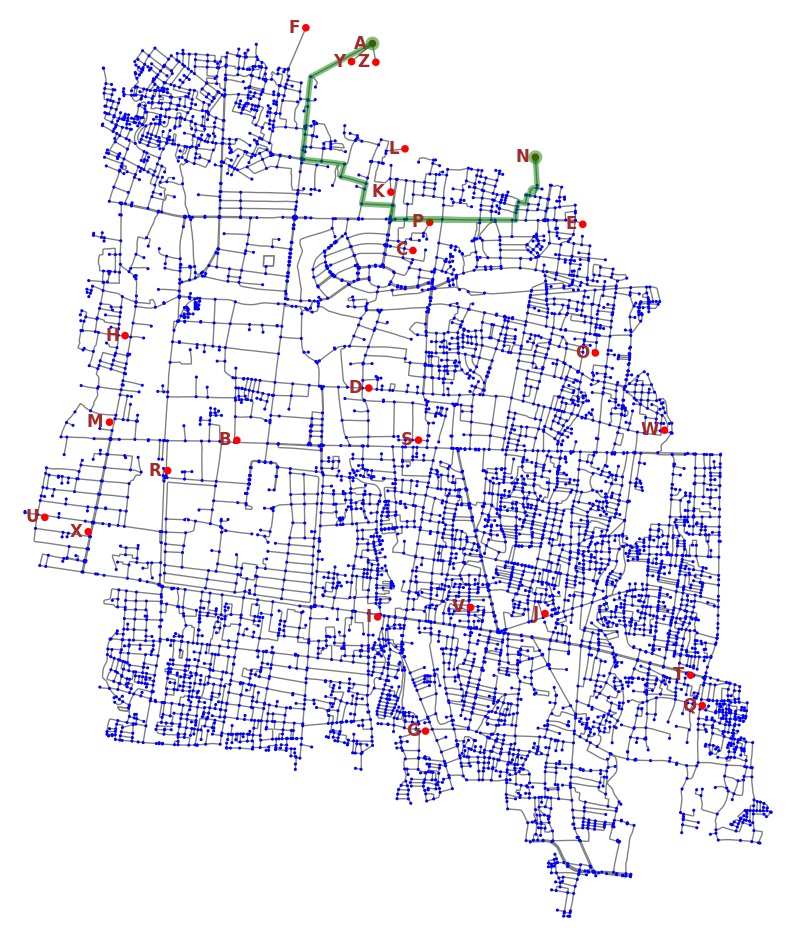

In [9]:
# @title Cari rute terpendek antar rumah sakit { run: "auto", vertical-output: true }
input_asal = "A - Dr. Sardjito General Hospital" # @param ["A - Dr. Sardjito General Hospital", "B - PKU Muhammadiyah Hospital Of Yogyakarta", "C - RS DKT Dr. Soetarto", "D - Bethesda Hospital Lempuyangwangi", "E - Siloam Hospitals Yogyakarta", "F - RSU Sakina Idama", "G - Rumah Sakit Umum Daerah (RSUD) Kota Yogyakarta", "H - Ludira Husada Tama Hospital", "I - RS Pratama", "J - Hidayatullah Islamic Hospital", "K - Dr. Yap Eye Hospital", "L - Panti Rapih Hospita", "M - Asri Medical Centre (AMC)", "N - RS Khusus Bedah An Nur Yogyakarta", "O - Happy Land Medical Centre", "P - Bethesda Hospital, Yogyakarta", "Q - RSKIA PKU Muhammadiyah Kotagede", "R - Rachmi Maternity Hospital Yogyakarta", "S - Puri Nirmala Psychiatric Hospital", "T - RSKIA Permata Bunda", "U - RSKIA 45 Prof. dr. Ismangoen", "V - Rumah Sakit Khusus Ibu dan Anak Bhakti", "W - RSK Bedah Soedirman", "X - RSKIA Fajar", "Y - RSUP Sardjito VVIP Ayodya", "Z - RSGM UGM Prof. Soedomo"]
input_tujuan = "N - RS Khusus Bedah An Nur Yogyakarta" # @param ["A - Dr. Sardjito General Hospital", "B - PKU Muhammadiyah Hospital Of Yogyakarta", "C - RS DKT Dr. Soetarto", "D - Bethesda Hospital Lempuyangwangi", "E - Siloam Hospitals Yogyakarta", "F - RSU Sakina Idama", "G - Rumah Sakit Umum Daerah (RSUD) Kota Yogyakarta", "H - Ludira Husada Tama Hospital", "I - RS Pratama", "J - Hidayatullah Islamic Hospital", "K - Dr. Yap Eye Hospital", "L - Panti Rapih Hospita", "M - Asri Medical Centre (AMC)", "N - RS Khusus Bedah An Nur Yogyakarta", "O - Happy Land Medical Centre", "P - Bethesda Hospital, Yogyakarta", "Q - RSKIA PKU Muhammadiyah Kotagede", "R - Rachmi Maternity Hospital Yogyakarta", "S - Puri Nirmala Psychiatric Hospital", "T - RSKIA Permata Bunda", "U - RSKIA 45 Prof. dr. Ismangoen", "V - Rumah Sakit Khusus Ibu dan Anak Bhakti", "W - RSK Bedah Soedirman", "X - RSKIA Fajar", "Y - RSUP Sardjito VVIP Ayodya", "Z - RSGM UGM Prof. Soedomo"]

import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

# Define your source and target nodes
source = input_asal[0]
target = input_tujuan[0]

# Retrieve node IDs for source and target from your coordinates
start_node = next((item for item in coords if item['name'] == source), None)['id']
end_node = next((item for item in coords if item['name'] == target), None)['id']

# Calculate the shortest path using A* algorithm
graph = graph.to_undirected()
shortest_path = nx.astar_path(graph, start_node, end_node, weight='length')

# Define node colors and sizes
node_colors = ['r' if node in added_nodes else 'b' for node in graph.nodes()]
node_sizes = [30 if node in added_nodes else 5 for node in graph.nodes()]

# Plot the graph
fig, ax = ox.plot_graph(graph, node_color=node_colors, node_size=node_sizes, edge_color='gray', bgcolor='w', figsize=(12, 12), close=False, show=False)

# Annotate added node names
for node_id in added_nodes:
    x, y = graph.nodes[node_id]['x'], graph.nodes[node_id]['y']
    name = graph.nodes[node_id]['name']
    ax.text(x - 0.0005, y, name, fontsize=12, fontweight='bold', color='brown', ha='right', va='center')

# Plot the shortest path on the same figure
ox.plot_graph_route(graph, shortest_path, route_color='green', node_size=3, ax=ax, node_color='k')

plt.show()


['D', 'B', 'C', 'G']


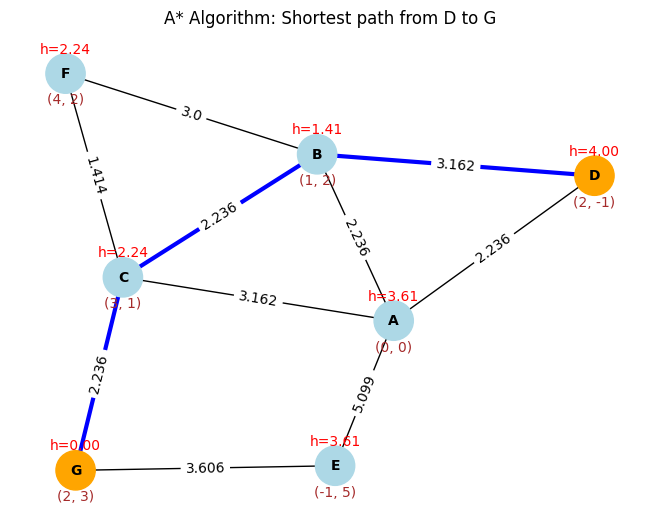

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Define Euclidean distance heuristic function
def euclidean_distance(node1, node2):
    x1, y1 = nodes[node1]
    x2, y2 = nodes[node2]
    return round(math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2), 3)

# Define the graph
G = nx.Graph()

# Define nodes and edges
nodes = {'A': (0, 0), 'B': (1, 2), 'C': (3, 1), 'D': (2, -1), 'E': (-1, 5), 'F': (4, 2), 'G': (2, 3)}
edges = [
    ('A', 'B', 0),
    ('A', 'C', 0),
    ('A', 'E', 0),
    ('B', 'C', 0),
    ('B', 'D', 0),
    ('B', 'F', 0),
    ('C', 'G', 0),
    ('D', 'A', 0),
    ('E', 'G', 0),
    ('F', 'C', 0),
]
edges = [(u, v, euclidean_distance(u, v)) for u, v, weight in edges]

# Add nodes and edges to the graph
G.add_nodes_from(nodes.keys())
G.add_weighted_edges_from(edges)

source = 'D'
target = 'G'

# Calculate heuristic value for each node
heuristic_values = {node: euclidean_distance(node, target) for node in G.nodes()}

# Visualize the graph
pos = nx.fruchterman_reingold_layout(G)

G.to_undirected()
shortest_path = nx.astar_path(G, source, target, weight='length')
print(shortest_path)

# Define node colors
shortest_path = ['D', 'B', 'C', 'G']
edge_colors = ['blue' if (u, v) in zip(shortest_path, shortest_path[1:]) or (v, u) in zip(shortest_path, shortest_path[1:]) else 'black' for u, v, d in G.edges(data=True)]
edge_widths = [3 if (u, v) in zip(shortest_path, shortest_path[1:]) or (v, u) in zip(shortest_path, shortest_path[1:]) else 1 for u, v, d in G.edges(data=True)]
node_colors = ['lightblue' if node != source and node != target else 'orange' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_size=800, node_color=node_colors, edge_color=edge_colors, width=edge_widths, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Print heuristic values on the plot
for node, (x, y) in pos.items():
    plt.text(x, y + 0.1, f'h={heuristic_values[node]:.2f}', ha='center', fontsize=10, color='red')
    plt.text(x, y - 0.15, f'{nodes[node]}', ha='center', fontsize=10, color='brown')

plt.title(f"A* Algorithm: Shortest path from {source} to {target}")
plt.show()

open_list = []
closed_list = []


In [4]:
import csv

# Write the data to a CSV file
with open('hospital_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['id', 'name', 'label', 'y', 'x']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in coords:
        writer.writerow(row)

NameError: name 'coords' is not defined

Current Node: D, Open List: [(4.576, 'B'), (5.842, 'A')], Closed List: {'D'}
Current Node: B, Open List: [(5.842, 'A'), (7.634, 'C'), (8.398, 'F')], Closed List: {'B', 'D'}
Current Node: A, Open List: [(7.634, 'C'), (8.398, 'F'), (10.941, 'E')], Closed List: {'A', 'B', 'D'}
Current Node: C, Open List: [(7.634, 'G'), (10.941, 'E'), (8.398, 'F')], Closed List: {'A', 'B', 'D', 'C'}
Shortest Path: ['D', 'B', 'C', 'G']


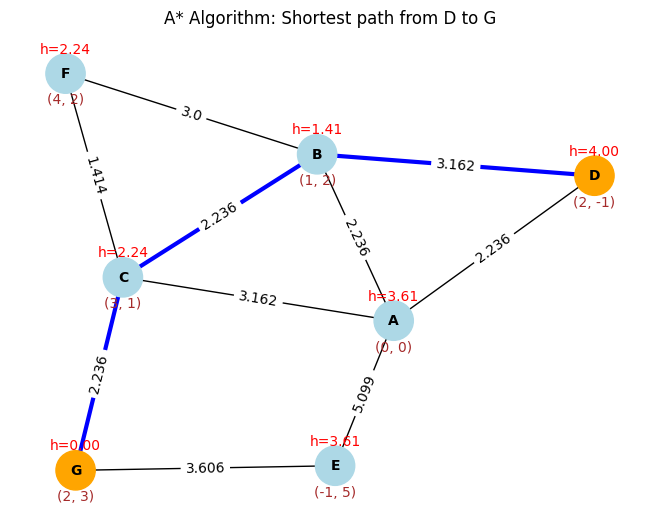

In [20]:
import networkx as nx
import math
import heapq

# Define Euclidean distance heuristic function
def euclidean_distance(node1, node2):
    x1, y1 = nodes[node1]
    x2, y2 = nodes[node2]
    return round(math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2), 3)

# Define A* algorithm function
def astar(graph, start, goal):
    open_list = [(0, start)]  # Priority queue, tuple: (f_score, node)
    closed_list = set()
    g_scores = {node: math.inf for node in graph.nodes()}
    g_scores[start] = 0
    parents = {}

    while open_list:
        _, current = heapq.heappop(open_list)
        closed_list.add(current)

        if current == goal:
            path = []
            while current in parents:
                path.insert(0, current)
                current = parents[current]
            path.insert(0, start)
            return path

        for neighbor in graph.neighbors(current):
            if neighbor in closed_list:
                continue

            tentative_g_score = g_scores[current] + graph[current][neighbor]['weight']
            if tentative_g_score < g_scores[neighbor]:
                parents[neighbor] = current
                g_scores[neighbor] = tentative_g_score
                f_score = g_scores[neighbor] + heuristic_values[neighbor]
                heapq.heappush(open_list, (round(f_score, 3), neighbor))

        # Print step
        print(f"Current Node: {current}, Open List: {open_list}, Closed List: {closed_list}")

    return None  # No path found

# Define the graph
G = nx.Graph()

nodes = {'A': (0, 0), 'B': (1, 2), 'C': (3, 1), 'D': (2, -1), 'E': (-1, 5), 'F': (4, 2), 'G': (2, 3)}
edges = [
    ('A', 'B', None),
    ('A', 'C', None),
    ('A', 'E', None),
    ('B', 'C', None),
    ('B', 'D', None),
    ('B', 'F', None),
    ('C', 'G', None),
    ('D', 'A', None),
    ('E', 'G', None),
    ('F', 'C', None),
]

edges = [(u, v, euclidean_distance(u, v)) for u, v, weight in edges]

# Add nodes and edges to the graph
G.add_nodes_from(nodes.keys())
G.add_weighted_edges_from(edges)

source = 'D'
target = 'G'

# Calculate heuristic value for each node
heuristic_values = {node: euclidean_distance(node, target) for node in nodes}

# Run A* algorithm
shortest_path = astar(G, source, target)
print("Shortest Path:", shortest_path)

# Define node colors
edge_colors = ['blue' if (u, v) in zip(shortest_path, shortest_path[1:]) or (v, u) in zip(shortest_path, shortest_path[1:]) else 'black' for u, v, d in G.edges(data=True)]
edge_widths = [3 if (u, v) in zip(shortest_path, shortest_path[1:]) or (v, u) in zip(shortest_path, shortest_path[1:]) else 1 for u, v, d in G.edges(data=True)]
node_colors = ['lightblue' if node != source and node != target else 'orange' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_size=800, node_color=node_colors, edge_color=edge_colors, width=edge_widths, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Print heuristic values on the plot
for node, (x, y) in pos.items():
    plt.text(x, y + 0.1, f'h={heuristic_values[node]:.2f}', ha='center', fontsize=10, color='red')
    plt.text(x, y - 0.15, f'{nodes[node]}', ha='center', fontsize=10, color='brown')

plt.title(f"A* Algorithm: Shortest path from {source} to {target}")
plt.show()